# Ejemplo de Clustering

Disponemos de un dataset de clientes de un Shopping Center (Mall).

El dataset consta de una serie de datos de clientes entre los que están:
- ID de Cliente
- Sexo del Cliente
- Edad
- Ingresos Anuales
- Scoring de Compra

El Scoring de Compra es un índice que mide lo que el cliente gasta (de 1 a 100). Valores más bajos indican un gasto menor en el Mall. Valores cercanos a 100 indican mayores gastos.


El Mall nos pide segmentar sus clientes en grupos teniendo en cuenta sus Ingresos Anuales y su Scoring de Compra.
Ellos no tienen idea de cuántos grupos pueden derivarse de los datos actuales.

Este es un típico problema de Clustering.

In [13]:
# Importamos las librerias
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Leemos el Dataset de Clientes

In [14]:
dataset = pd.read_csv('Mall_Customers.csv')

# Veamos su aspecto
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Seleccionamos las variables que nos interesan

In [15]:
# Solo nos quedamos con 'Annual Income' y 'Spending Score'
# Columnas 3 y 4 (empezando por 0)
X = dataset.iloc[:,[3,4]].values

### Metodo de seleccion del numero de Clusters

In [16]:
# Vamos a usar el metodo del codo para obtener el numero de clusters optimo

from sklearn.cluster import KMeans

wcss=[]

# como no tenemos idea del numero de clusters, hacemos un barrido entre 1 y 11
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,    ## numero de clusters
                    init='k-means++',  ## metodo de inicializacion
                    max_iter=300,      ## maximo numero de iteraciones [300]
                    n_init=10,         ## numero de veces que se ejecuta KMeans con diferentes centroides iniciales
                    random_state=0)    ## es como el seed de R
    kmeans.fit(X)                      ## 
    wcss.append(kmeans.inertia_)       ## .inertia_ calcula el wcss para cada iteracion para el objeto kmeans 
    


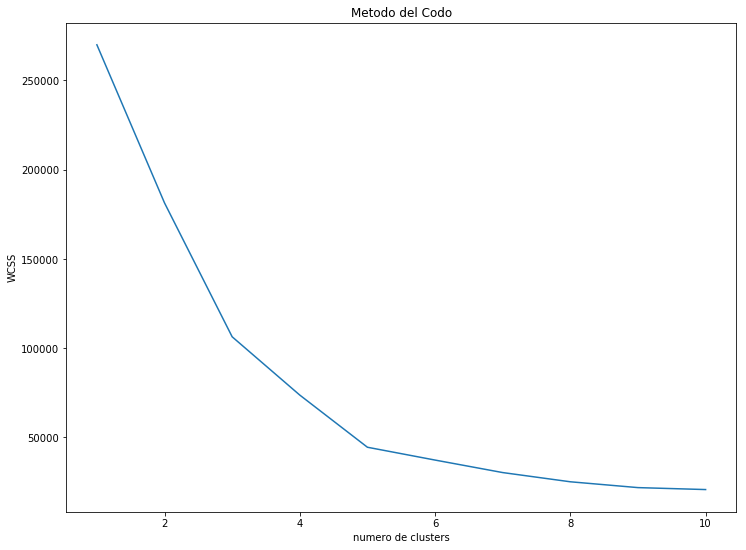

In [17]:
%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.plot(range(1,11),wcss)
plt.title('Metodo del Codo')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS')
plt.rcParams["figure.figsize"] = fig_size
plt.show()



### Ejecutamos KMeans con el mejor numero de Clusters

In [19]:
# Segun el metodo de codo el numero de clusters optimo seria 5
kmeans = KMeans(n_clusters = 5,    ## numero de clusters
                    init='k-means++',  ## metodo de inicializacion
                    max_iter=300,      ## maximo numero de iteraciones [300]
                    n_init=10,         ## numero de veces que se ejecuta KMeans con diferentes centroides iniciales
                    random_state=0)    ## es como el seed de R

# calculamos el cluster al que pertenece cada uno de los datos del dataset y les asigna un id de cluster
# genera un vector
y_kmeans = kmeans.fit_predict(X)


<function matplotlib.pyplot.show>

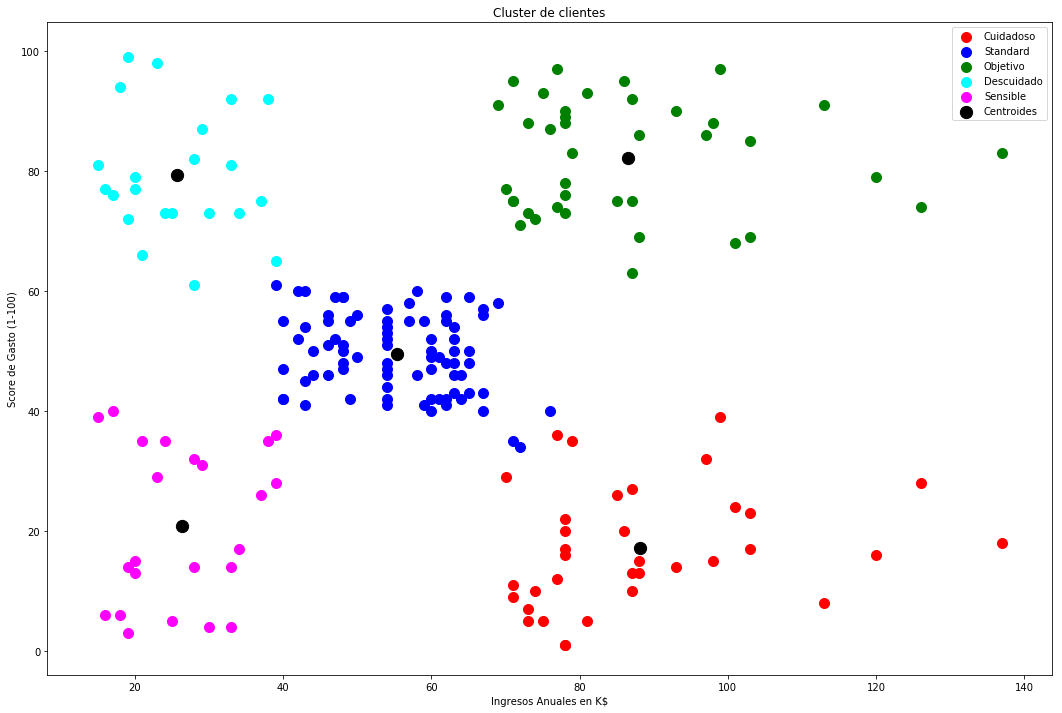

In [20]:
# Visualizamos los clusters
%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 18
fig_size[1] = 12

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans==0,1], s = 100, c = 'red', label = 'Cuidadoso')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans==1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans==2,1], s = 100, c = 'green', label = 'Objetivo')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans==3,1], s = 100, c = 'cyan', label = 'Descuidado')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans==4,1], s = 100, c = 'magenta', label = 'Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 150, c='black',label = 'Centroides' )
plt.title('Cluster de clientes')
plt.xlabel('Ingresos Anuales en K$')
plt.ylabel('Score de Gasto (1-100)')

plt.rcParams["figure.figsize"] = fig_size
plt.legend()
plt.show